<a href="https://colab.research.google.com/github/RiteshAgrawal2001/BIG-DATA-/blob/main/Prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **PRACTICAL NO. 6**



Aim: Write a program to implement K-Nearest Neighbor algorithm to classify the object. Use an appropriate dataset for classification.


In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/heart.csv')


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
y = df['output']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
Scaler = StandardScaler()

In [13]:

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape



(227, 14)

In [15]:
y_test.shape



(76,)

In [16]:
Scaler.fit(X_train)
Scaler.mean_


array([5.47400881e+01, 6.87224670e-01, 9.64757709e-01, 1.31832599e+02,
       2.46140969e+02, 1.36563877e-01, 5.28634361e-01, 1.49158590e+02,
       3.30396476e-01, 1.05462555e+00, 1.38766520e+00, 7.40088106e-01,
       2.34361233e+00, 5.46255507e-01])

In [17]:

X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)



In [18]:

X_train



array([[ 0.58769323,  0.6746319 , -0.91982712, ...,  0.25190224,
         1.07141577, -1.09721625],
       [-1.0882661 ,  0.6746319 , -0.91982712, ...,  2.19026861,
         1.07141577, -1.09721625],
       [ 0.4759626 ,  0.6746319 ,  1.94045721, ..., -0.71728095,
         1.07141577, -1.09721625],
       ...,
       [ 0.58769323,  0.6746319 , -0.91982712, ...,  1.22108543,
         1.07141577, -1.09721625],
       [ 0.81115447, -1.48228982, -0.91982712, ...,  1.22108543,
        -0.56087537, -1.09721625],
       [ 1.59326882, -1.48228982,  1.94045721, ...,  1.22108543,
        -0.56087537,  0.91139737]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier

Model_KNN =   KNeighborsClassifier()

In [41]:
Model_KNN = KNeighborsClassifier(n_neighbors=5)


In [46]:
Model_KNN.fit(X,y)

KNeighborsClassifier()

In [47]:
Model_KNN.score(X_test,y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.4605263157894737

In [48]:

X_train_0 = X_train[y_train==0]
X_train_1 = X_train[y_train==1]


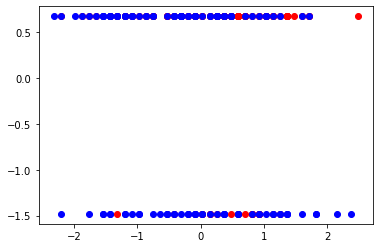

In [51]:


plt.scatter(X_train_0[:,0],X_train_0[:,1],c='red')
plt.scatter(X_train_1[:,0],X_train_1[:,1],c='blue')


In [52]:
y_predict = Model_KNN.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
X_test_0_act = X_test[y_test==0]
X_test_1_act = X_test[y_test==1]
X_test_0_pre = X_test[y_predict==0]
X_test_1_pre = X_test[y_predict==1]



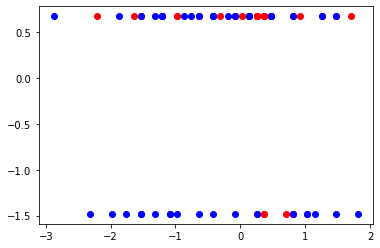

In [54]:
plt.scatter(X_test_0_act[:,0],X_test_0_act[:,1],c='red')
plt.scatter(X_test_1_act[:,0],X_test_1_act[:,1],c='blue')



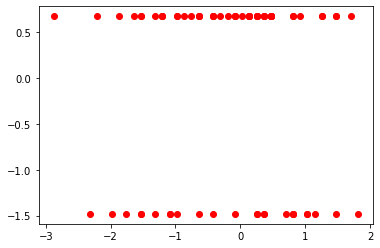

In [55]:
plt.scatter(X_test_0_pre[:,0],X_test_0_pre[:,1],c='red')
plt.scatter(X_test_1_pre[:,0],X_test_1_pre[:,1],c='blue')



In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[35,  0],
       [41,  0]])

Text(24.0, 0.5, 'Truth')

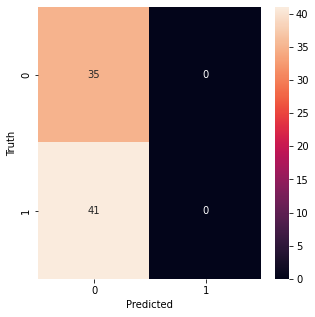

In [76]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.46      1.00      0.63        35
           1       0.00      0.00      0.00        41

    accuracy                           0.46        76
   macro avg       0.23      0.50      0.32        76
weighted avg       0.21      0.46      0.29        76



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
